In [1]:
import numpy as np
import json

In [2]:
influence_values = np.load('outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/influence_values.npy')
influence_values_rep = np.load('outputs/MNIST/test/image_classifier/representer_points_with_sec/influence_values.npy')
training_idx, validation_idx = [json.load(open(f'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/{x}_idx.json')) for x in ['training', 'validation']]

In [3]:
pred = [json.loads(line) for line in open("outputs/MNIST/test/image_classifier/predictions.dev.jsonl")]

In [6]:
devclasses = [p['gold_labels'] for p in pred]

In [7]:
from influence_info.dataset_readers.image_reader import ImageReader
reader = ImageReader(as_is=True)
training_data = {i: (image, label) for (i, image, label) in list(reader._read('train'))}
validation_data = {i: (image, label) for (i, image, label) in list(reader._read('dev'))}

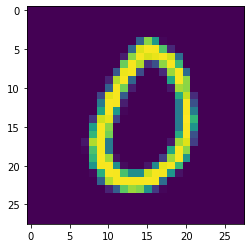

---
0.00086937344
0.0006519989
0.00064076646
0.00063323183
0.00058102485


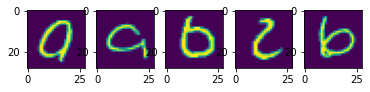

---
-0.0011745292
-0.0011785283
-0.00118013
-0.0011865946
-0.0011978378


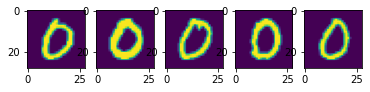

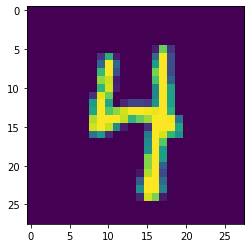

---
0.0010600721
0.0010439502
0.0010029636
0.0009978533
0.0009965473


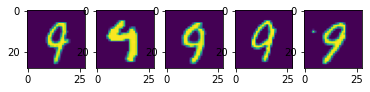

---
-0.0011649164
-0.0011670904
-0.0011671435
-0.0011718393
-0.0011746857


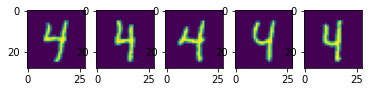

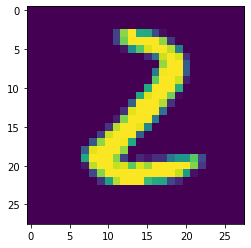

---
0.00091042183
0.0008583118
0.0008013452
0.0007855733
0.00077469577


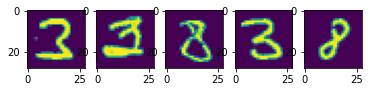

---
-0.0011880153
-0.0011907833
-0.0012134232
-0.001214171
-0.0012141755


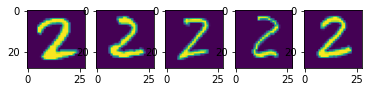

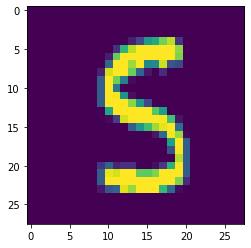

---
0.0009147208
0.00091185834
0.0009010199
0.0008760302
0.00086798344


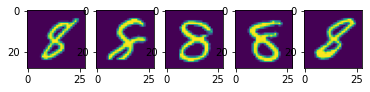

---
-0.0011296178
-0.0011329434
-0.0011404747
-0.0011509411
-0.0011571214


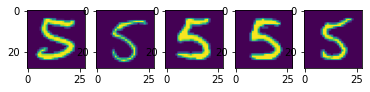

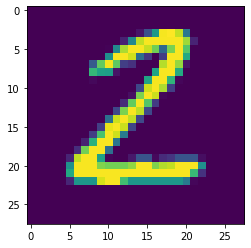

---
0.00089830946
0.0008949259
0.00087156706
0.00086657447
0.00086351734


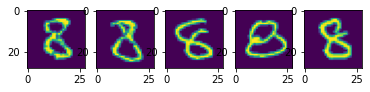

---
-0.0011574345
-0.0011576164
-0.0011734465
-0.0011997711
-0.0012088724


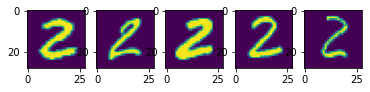

In [10]:
import random
import matplotlib.pyplot as plt

for i in range(5) :
    i = random.randint(0, 450)
    v = validation_data[i]
    plt.imshow(v[0][0])
    plt.show()
    print("---")
    vals = influence_values[i, :, devclasses[i]]
    top = np.argsort(vals)[-5:]
    fig = plt.figure()
    for k, j in enumerate(top[::-1]) :
        print(vals[j])
        plt.subplot(1, 5, k + 1)
        plt.imshow(training_data[j][0][0])
    plt.show()
    print("---")
    vals = influence_values[i, :, devclasses[i]]
    top = np.argsort(vals)[:5]
    fig = plt.figure()
    for k, j in enumerate(top[::-1]) :
        print(vals[j])
        plt.subplot(1, 5, k + 1)
        plt.imshow(training_data[j][0][0])
    plt.show()
    print("==="*10)

In [ ]:
influence_values.shape